In [120]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

m = MorphAnalyzer()
regex = re.compile("[а-яa-z]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

In [121]:
def my_text():
    f = open('Text4.txt.','r')
    t= f.read()
    f.close()
    return t

In [122]:
mt = my_text()

In [123]:
words_only(mt)[:20]

['уильям',
 'шекспир',
 'сон',
 'в',
 'летнюю',
 'ночь',
 'пер',
 'м',
 'лозинский',
 'действующие',
 'лица',
 'тезей',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермии',
 'лизандр',
 'влюбленные',
 'в']

In [139]:
# The number of unique words 
word_counts = dict()
words = words_only(mt)
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1


In [ ]:
print(word_counts)

In [141]:
print(len(word_counts))

5148


In [127]:
# Text normalization
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]


mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return remove_stopwords(lemmas)

In [128]:
clean_text(mt)[:20]

['уильям',
 'шекспир',
 'летний',
 'ночь',
 'лозинский',
 'действовать',
 'лицо',
 'тезь',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермия',
 'лизандра',
 'влюбить',
 'гермия',
 'деметрия',
 'филострата',
 'распорядитель',
 'празднество']

In [129]:
# The number of unique lems
lem_counts = dict()
lem_words = clean_text(mt)
for word in lem_words:
    if word in lem_counts:
        lem_counts[word] += 1
    else:
        lem_counts[word] = 1

In [ ]:
print(lem_counts)

In [131]:
print(len(lem_counts))

3156


WordCloud

In [132]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [133]:
words = words_only(mt)
mystopwords = stopwords.words('russian') 
def remove_stopwords(words = words, stopwords = mystopwords):
    return [w for w in words if not w in stopwords and len(w) > 3]
    

In [134]:
remove_stopwords()[:20]

['уильям',
 'шекспир',
 'летнюю',
 'ночь',
 'лозинский',
 'действующие',
 'лица',
 'тезей',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермии',
 'лизандр',
 'влюбленные',
 'гермию',
 'деметрий',
 'филострат',
 'распорядитель',
 'празднеств']

In [135]:
n_text = ' '.join(remove_stopwords())

In [ ]:
n_text

In [137]:
cloud_Shakespeare = WordCloud(width=800, height=400).generate(n_text)

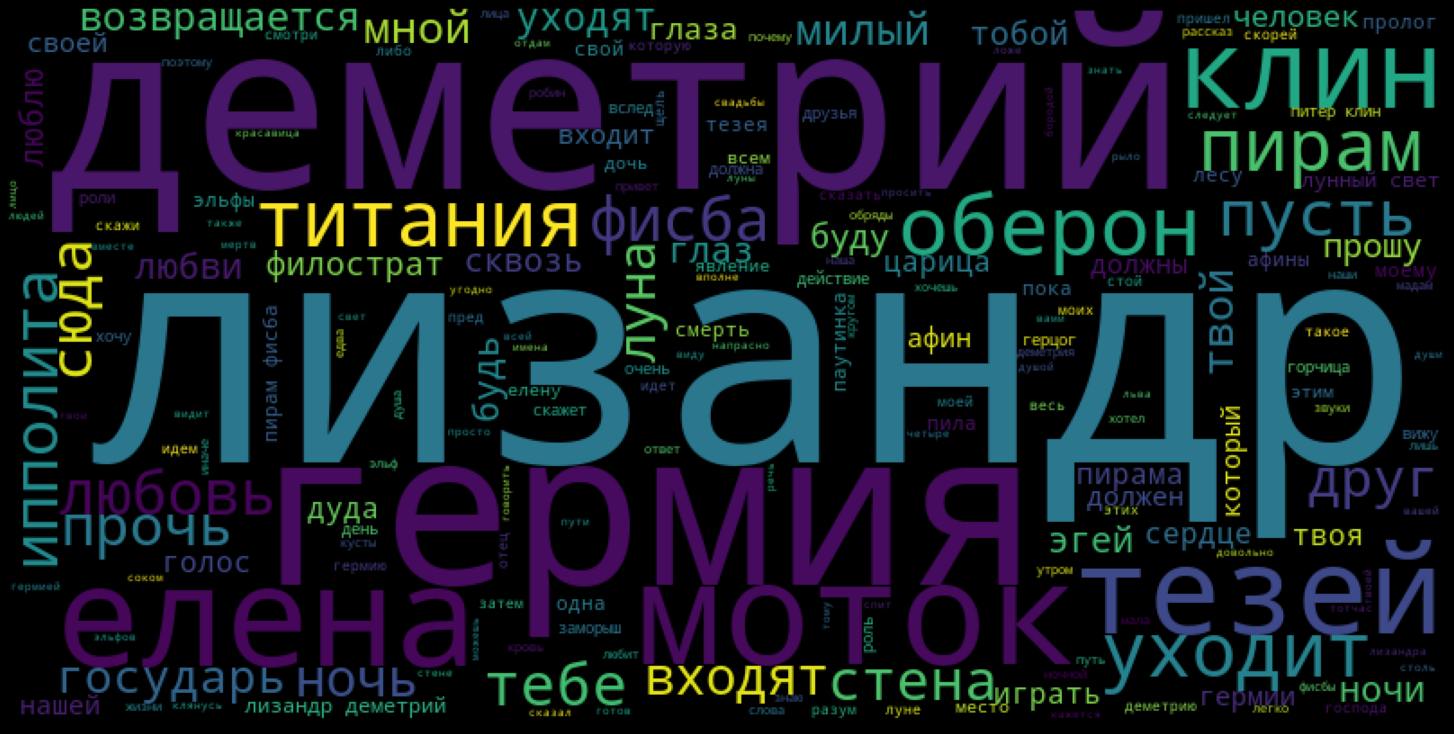

In [138]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(cloud_Shakespeare)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()